<a href="https://colab.research.google.com/github/dcrey7/bayesian-testing/blob/main/STAT01_Power_Analysis_For_Sample_Size_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [Blog](https://pub.towardsai.net/power-analysis-for-sample-size-using-python-33da7d5f570d) post for the tutorial
- Video tutorial for this post on [YouTube](https://www.youtube.com/watch?v=rrFDeTEX37Q&list=PLVppujud2yJp5G5WwOWR4P2nXfdT5Pkxc&index=1)
- Click [here](https://mailchi.mp/f561ff83e739/mfl1gl8ksd) for the Colab notebook.
- More video tutorials on [statistics](https://www.youtube.com/playlist?list=PLVppujud2yJp5G5WwOWR4P2nXfdT5Pkxc)
- More blog posts on [statistics](https://medium.com/@AmyGrabNGoInfo/list/statistics-4dbda6b2001e)
- If you are not a Medium member and want to support me as a writer (😄 Buy me a cup of coffee ☕), join Medium membership through [this link](https://medium.com/@AmyGrabNGoInfo/membership). You will get full access to posts on Medium for $5 per month, and I will receive a portion of it. Thank you for your support!

# Intro

Power analysis is a statistical analysis based on significance level, effect size, statistical power, and sample size. We can use it to calculate any one of the four values given the other three. Power analysis and sample size calculation are common interview questions for data analyst, data scientist, and machine learning engineer positions.

In this tutorial, we will cover
* What are significance level, effect size, statistical power, and sample size?
* How to calculate the sample size for hypothesis testing (AB testing) using Python?
* How to calculate the statistical power using Python?
* How to calculate the minimum detectable effect size using Python?
* How to calculate the significance level using Python?
* How do sample size, significance level, and effect size impact the statistical power?

Let's get started!

# Step 0: What are significance level, effect size, statistical power, and sample size

Power analysis is commonly used for sample size calculations in hypothesis testing. This step will talk about the four components of power analysis: significance level, effect size, statistical power, and sample size.
* Significance level is also called alpha. It is the probability of rejecting the null hypothesis when it is true. Alpha tells us about the false positive rate or type I error. A commonly used alpha value is 0.05.
* Effect size is the magnitude of the difference between the null hypothesis and alternative hypothesis.  
 * Other factors being the same, we need a larger sample size to detect a smaller effect size. 
 * The more significant effect size is, the less likely the difference between treatment and control is due to random error. Conversely, when there is more variability in the dataset, the difference is more likely due to random error.
 * Cohen's d measures the distance between the mean of treatment and control group while considering the standard deviation. Usually, the Cohen's d value of 0.2 is considered to be a small effect size, 0.5 a medium effect size, and 0.8 a large effect size.
 * The effect size needs to be meaningful from a business perspective.
* Statistical power is the probability of correctly rejecting the null hypothesis. Or we can say it's the probability of detecting an effect if it exists. Power equals one minus beta, where beta is the false negative rate or type II error. 0.8 is a commonly used value for power.
* Sample size is the minimum sample size needed per group. 

# Step 1: Import Libraries

In the first step, we will import libraries for the power analysis. 

`numpy` is for data calculation. `TTestIndPower` is imported from `statsmodels` for power analysis of a two-sample independent t-test. `matplotlib` is for visualization.

In [ ]:
# Data calculation
import numpy as np

# Power analysis
from statsmodels.stats.power import TTestIndPower

# Visualization
import matplotlib.pyplot as plt

# Step 2: Calculate Sample Size

In step 2, we will calculate the sample size needed for a two-sample t-test. To calculate the sample size, we need to provide effect size, alpha, and power values.

Effect size refers to the standardized effect size. The difference between the treatment and control group mean is divided by the pooled standard deviation. The `effect_size` value needs to be a positive number. We use the value 0.2 for the effect size, which is a small effect size value.

`alpha` is the significance level, and `power` is the statistical power. We use the commonly used value of 0.05 for `alpha` and 0.8 for `power`.

We are doing a two-sided hypothesis testing, so `alternative = 'two-sided'`.

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = 0.2, alpha = 0.05, power = 0.8, alternative = 'two-sided')

# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 393


The power analysis gave us a sample size of 393. That means we need at least 393 samples in each AB testing group to detect a slight difference with 80% power and a 5% significance level.

# Step 3: Calculate Power

In step 3, we will calculate the power using effect size, significance level, and sample size.

We use the sample size 393, which was calculated from the previous step, for the power calculation.

`ratio = 1` means the number of samples in the control and treatment groups are the same.

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate power
power = power_analysis.power(effect_size = 0.2, alpha = 0.05, nobs1 = 393, ratio = 1, alternative = 'two-sided')

# Print results
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.8


We get the power of 0.8, which is consistent with the previous results in the sample size calculation.

# Step 4: Calculate Effect Size

There are different ways of calculating effect size. Cohen's d is one of the most widely used methods for effect size calculation. In step 4, we will calculate effect size using Cohen's d's equation.

Cohen's d's equation needs the mean, standard deviation, and sample sizes for the treatment and control group. It first calculates the pooled standard deviation and then uses the mean difference divided by the pooled standard deviation.



In [ ]:
# Input parameters
mu1 = 2.1 # Group 1 average value
mu2 = 1.9 # Group 2 average value
s1 = 0.6 # Group 1 standard deviation
s2 = 0.5 # Group 2 standard deviation
n1 = 400 # Group 1 sample size
n2 = 400 # Group 2 sample size

# Calculate the pooled standard deviation
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# Calculate the Cohen's d effect size
d = (mu1 - mu2) / s

# Print results
print('The effect size for the hypothesis testing is', round(d, 2))

The effect size for the hypothesis testing is 0.27


We get the effect size of 0.27, which is a relatively small Cohen's d value.

# Step 5: Calculate Significance Level

In step 5, we will calculate the significance level given the other three values.

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate power
alpha = power_analysis.solve_power(effect_size = 0.2, power = 0.8, nobs1 = 393, ratio = 1, alternative = 'two-sided')

# Print results
print('The significance level for the hypothesis testing is', round(alpha, 2))

The significance level for the hypothesis testing is 0.05


We get a significance level of 0.05, which is consistent with the previous results.

# Step 6: Sample Size Vs Statistical Power

In step 6, we will examine how statistical power changes with sample size changes.

`dep_var` specifies the measure for the x-axis. `dep_var='nobs'` means that we are using sample size as x-axis and power as the y axis. 

`nobs` is the value of sample size. We used the value of 5 to 800 to plot the graph.

`effect_size` is the effect size value for the power analysis. We used the widely used Cohen's d value for small, medium, and large effect sizes. Each `effect_size` has one curve on the graph.

`alpha` is the significance level. We used 0.05 for this plot.

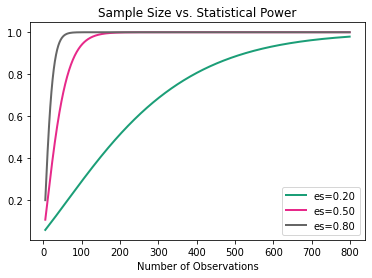

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 800),
                          effect_size=np.array([0.2, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

From the graph, we can see that 
* Statistical power increases with the sample size. 
* To achieve the same statistical power, we need more samples to detect a smaller effect size.

# Step 7: Effect Size Vs Statistical Power

In step 7, we will examine how statistical power changes with effect size.

The `'effect_size'` is used as x-axis. We plot the curves for three sample sizes, 50, 100, and 500. 

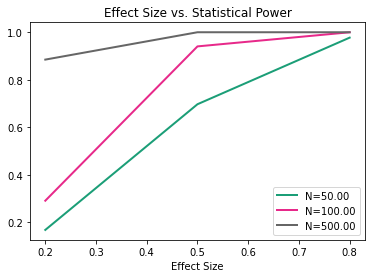

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='effect_size',
                          nobs=np.array([50, 100, 500]),
                          effect_size=np.array([0.2, 0.5, 0.8]),
                          alpha=0.05,
                          title='Effect Size vs. Statistical Power')
plt.show()

From the graph, we can see that 
* Statistical power increases with effect size.
* When the effect size is small, a larger sample size is needed to achieve a good power value. 
* As effect size increases, the impact of sample size on power is smaller.

# Step 8: Significance Level Vs Statistical Power

In step 8, we will examine how statistical power changes with the significance level.

`'alpha'` is used as the x-axis. We plot the curves for the alpha range from 0.01 to 0.30. The `effect_size` is fixed at 0.5.

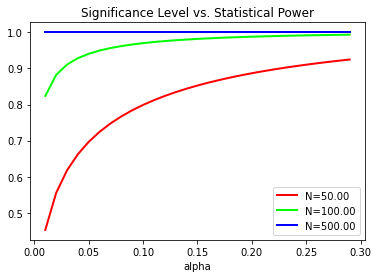

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='alpha',
                          nobs=np.array([50, 100, 500]),
                          effect_size=0.5,
                          alpha=np.arange(0.01,0.30, 0.01),
                          title='Significance Level vs. Statistical Power')
plt.show()

From the graph, we can see that 
* Statistical power increases with significance level.
* When alpha is small, a larger sample size is needed to achieve a good power value. 
* As alpha increases, the impact of sample size on power is smaller.

# Summary

In this tutorial, we talked about how to use statistical power analysis for hypothesis testing. The method can be used to calculate the minimum sample size needed for AB testing. We covered
* What are significance level, effect size, statistical power, and sample size?
* How to calculate the sample size for hypothesis testing (AB testing) using Python?
* How to calculate the statistical power using Python?
* How to calculate the minimum detectable effect size using Python?
* How to calculate the significance level using Python?
* How do sample size, significance level, and effect size impact the statistical power?

# Recommended Tutorials

* [Four Oversampling And Under-Sampling Methods For Imbalanced Classification Using Python](https://grabngoinfo.com/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python/)
* [Neural Network Model Balanced Weight For Imbalanced Classification In Keras](https://grabngoinfo.com/neural-network-model-balanced-weight-for-imbalanced-classification-in-keras/)
* [Isolation Forest For Anomaly Detection](https://grabngoinfo.com/isolation-forest-for-anomaly-detection-and-imbalanced-classification/)
* [Sentiment Analysis Without Modeling: TextBlob Vs VADER Vs Flair](https://grabngoinfo.com/sentiment-analysis-without-modeling-textblob-vs-vader-vs-flair/)

# References

* [statsmodels documentation on power analysis](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.html)